In this lab, we will cover



*   Quick recap of linear regression
*   multiple linear regression
*   polynomial regression



A simple workflow to build a predictive regression model is as follows:


1.   Randomly split your data into training set (80%) and test set (20%)
2.   Build the regression model using the training set
3. Make predictions using the test set and compute model metrics



In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Install package named devtools
install.packages('devtools')
# install 'datarium' package.
devtools::install_github("kassambara/datarium")

# github link:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp6lBd4G/remotes2b59f68e63/kassambara-datarium-f65be1d/DESCRIPTION’ ... OK
* preparing ‘datarium’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘datarium_0.1.0.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Get the marketing dataset in the 'datarium' package
data('marketing', package='datarium')

The marketing data set [datarium package] contains the impact of three
advertising medias (youtube, facebook and newspaper) on sales. It will be used
for predicting sales units on the basis of the amount of money spent in the three
advertising medias.
Data are the advertising budget in thousands of dollars along with the sales. The
advertising experiment has been repeated 200 times with different budgets and
the observed sales have been recorded.

In [ ]:
marketing

youtube,facebook,newspaper,sales
<dbl>,<dbl>,<dbl>,<dbl>
276.12,45.36,83.04,26.52
53.40,47.16,54.12,12.48
20.64,55.08,83.16,11.16
181.80,49.56,70.20,22.20
216.96,12.96,70.08,15.48
10.44,58.68,90.00,8.64
69.00,39.36,28.20,14.16
144.24,23.52,13.92,15.84
10.32,2.52,1.20,5.76


# Multiple linear regression

Multiple linear regression is an extension of simple linear regression for
predicting an outcome variable (y) on the basis of multiple distinct predictor
variables (x).

For example, with three predictor variables (x), the prediction of y is expressed by the following equation: y = b0 + b1*x1 + b2*x2 + b3*x3
The regression beta coefficients measure the association between each predictor
variable and the outcome. "b_j" can be interpreted as the average effect on y of a one unit increase in "x_j", holding all other predictors fixed.

In this section, we'll build a multiple regression model to predict sales based on the budget invested in three advertising medias: youtube, facebook and
newspaper. The formula is as follow: sales = b0 + b1*youtube +
b2*facebook + b3*newspaper

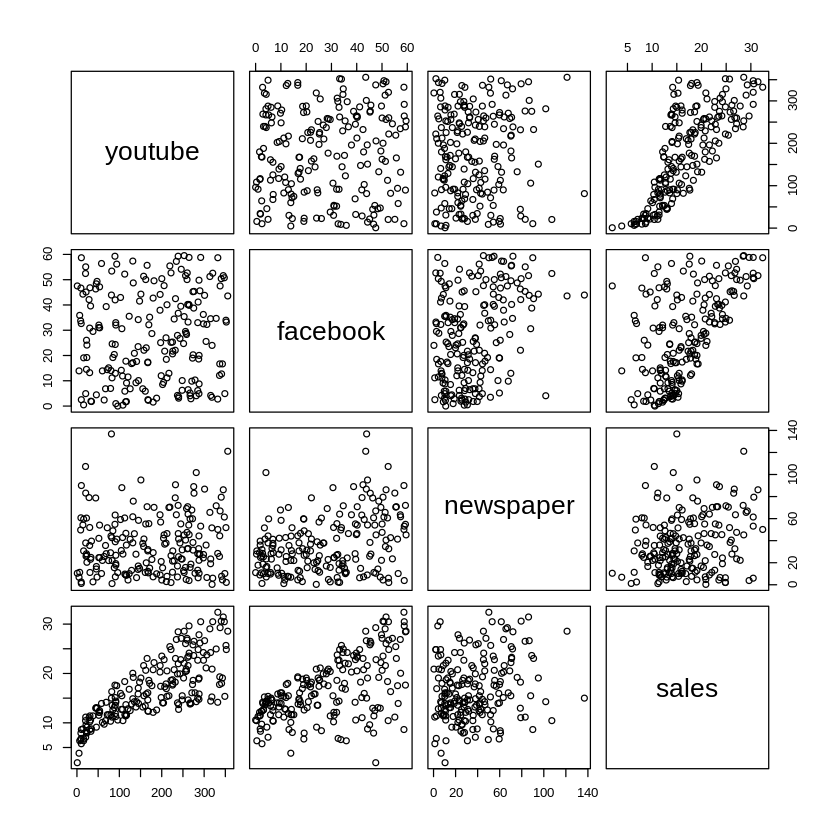

In [ ]:
# Data visualization
plot(marketing)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


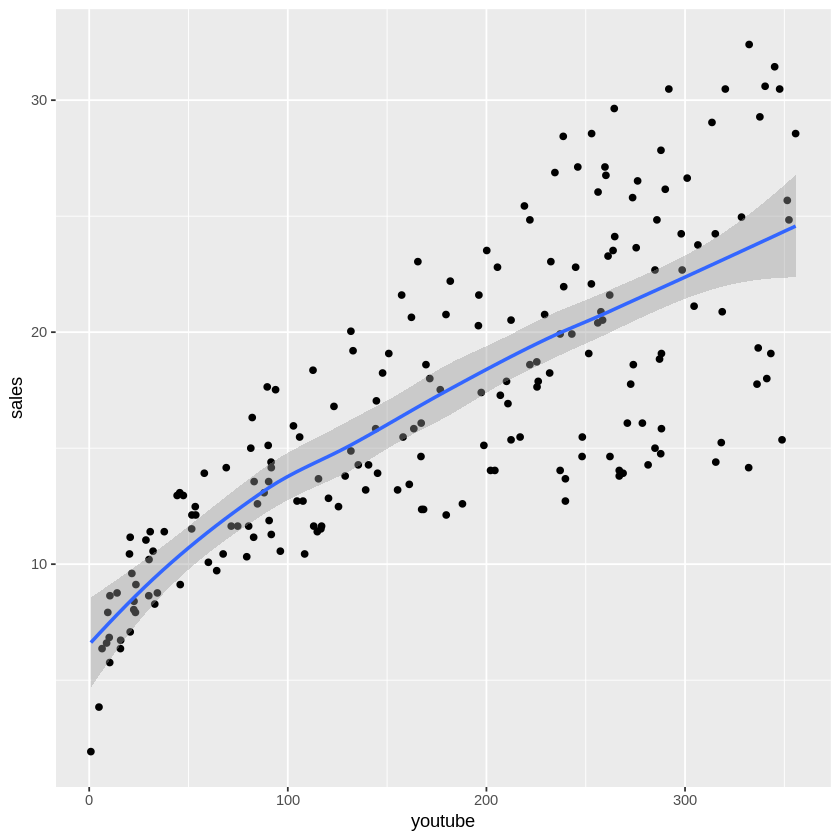

In [ ]:
ggplot(marketing, aes(x=youtube, y=sales))+ geom_point() + stat_smooth()

# Task 1a:
1. Set seed for reproducibility. For this lab, set it at 123
2. Split marketing dataset into 80% and 20% into train_set and test_set
3. Print rows of marketing dataset, train_set and test_set to check split is done correctly



In [ ]:
# set seed '123' for reproducibility.

# Split the dataset into train and test by ratio 80/20


In [ ]:
# check number of samples in each dataset


[1] 200
[1] 163
[1] 37


In [ ]:
mmodel <- lm (sales ~ youtube + facebook + newspaper, data = train_set)

In [ ]:
summary(mmodel)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0467  -0.9950   0.2292   1.4328   3.6086 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.224725   0.422488   7.633    2e-12 ***
youtube      0.048027   0.001564  30.699   <2e-16 ***
facebook     0.183402   0.009655  18.996   <2e-16 ***
newspaper   -0.001308   0.006472  -0.202     0.84    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.058 on 159 degrees of freedom
Multiple R-squared:  0.9005,	Adjusted R-squared:  0.8986 
F-statistic: 479.5 on 3 and 159 DF,  p-value: < 2.2e-16


## Summary outputs
The summary outputs shows 6 components, including:

1. Call : Shows the function call used to compute the regression model.

2. Residuals : Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, the median should not be far from zero, and the minimum and maximum should be roughly equal in
absolute value.

3. Coefficients : Shows the regression beta coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.

4. Residual standard error (RSE), R-squared (R2) and the F-statistic are metrics that are used to check how well the model fits to our data.


## Coefficient table
The coefficients table shows the beta coefficient estimates and their significance levels. Columns are:

1. Estimate : the intercept (b0) and the beta coefficient estimates associated to
each predictor variable

2. Std.Error : the standard error of the coefficient estimates. This represents
the accuracy of the coefficients. The larger the standard error, the less
confident we are about the estimate.

3. t value : the t-statistic, which is the coefficient estimate (column 2)
divided by the standard error of the estimate (column 3)

4. Pr(>|t|) : The p-value corresponding to the t-statistic. The smaller the p-
value, the more significant the estimate is.

The first step in interpreting the multiple regression analysis is to examine the F- statistic and the associated p-value, at the bottom of model summary.

**In our example, it can be seen that p-value of the F-statistic is < 2.2e-16, which is highly significant. This means that, at least, one of the predictor variables is significantly related to the outcome variable.**

## Coefficients significance
To see which predictor variables are significant, you can examine the coefficients table, which shows the estimate of regression beta coefficients and
the associated t-statistic p-values.


In [ ]:
summary(mmodel)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.224724734,0.422488402,7.6326941,1.998875e-12
youtube,0.048027496,0.001564472,30.6988574,1.022763e-68
facebook,0.183402365,0.009654766,18.9960453,9.493746e-43
newspaper,-0.001308019,0.006471623,-0.2021161,8.400843e-01


For a given the predictor, the t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable, that is whether the beta coefficient of the predictor is significantly different from zero.

**It can be seen that, changing in youtube and facebook advertising budget
are significantly associated to changes in sales while changes in newspaper budget is not significantly associated with sales.**

For a given predictor variable, the coefficient (b) can be interpreted as the average effect on y of a one unit increase in predictor, holding all other
predictors fixed.

**For example, for a fixed amount of youtube and newspaper advertising budget, spending an additional 1 000 dollars on facebook advertising leads to an increase in sales by approximately 0.1834*1000 = 183 sale units, on average.**

**The youtube coefficient suggests that for every 1 000 dollars increase in youtube advertising budget, holding all other predictors constant, we can expect an increase of 0.048*1000 = 48 sales units, on average.**

**We found that newspaper is not significant in the multiple regression model. This means that, for a fixed amount of youtube and facebook advertising
budget, changes in the newspaper advertising budget will not significantly affect sales units.**

**As the newspaper variable is not significant, it is possible to remove it from the
model.**

# Task 1b
1. Fit train_set into a multiple linear regression model named 'model2' with predictor as youtube and facebook and prediction as sales.
2. Print model2 summary

In [ ]:
# Write code here


Call:
lm(formula = sales ~ youtube + facebook, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9992 -0.9842  0.2268  1.4364  3.5852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.197812   0.399754   7.999 2.38e-13 ***
youtube     0.048025   0.001560  30.791  < 2e-16 ***
facebook    0.182682   0.008946  20.420  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.052 on 160 degrees of freedom
Multiple R-squared:  0.9004,	Adjusted R-squared:  0.8992 
F-statistic: 723.6 on 2 and 160 DF,  p-value: < 2.2e-16


Finally, our model equation can be written as follow:

sales = 3.197812 + 0.048025 youtube + 0.182682 facebook

## Model accuracy

Once you identified that, at least, one predictor variable is significantly
associated to the outcome, you should continue the diagnostic by checking how
well the model fits the data. This process is also referred to as the **goodness-of-fit**.

The overall quality of the linear regression fit can be assessed using the following three quantities, displayed in the model summary:
1. Residual Standard Error (RSE),
2. R-squared (R2) and adjusted R2,
3. F-statistic


### 1. Residual standard error (RSE)
The RSE (or model sigma ), corresponding to the prediction error, represents
roughly the average difference between the observed outcome values and the
predicted values by the model. The lower the RSE the best the model fits to our
data.

Dividing the RSE by the average value of the outcome variable will give you the
prediction error rate, which should be as small as possible.




In [ ]:
RSE = sigma(model2)  # RSE
error_rate = RSE/mean(train_set$sales)

print(RSE)
print(error_rate)

[1] 2.051899
[1] 0.1208238


In our example, using only youtube and facebook predictor variables, the
RSE = 2.05, meaning that the observed sales values deviate from the
predicted values by approximately 2.05 units in average.
This corresponds to an error rate of 12%, which is low.

### 2. R-squared and Adjusted R-squared
The R-squared (R2) ranges from 0 to 1 and represents the proportion of variation in the outcome variable that can be explained by the model predictor variables.

For a simple linear regression, R2 is the square of the Pearson correlation
coefficient between the outcome and the predictor variables. In multiple linear
regression, the R2 represents the correlation coefficient between the observed outcome values and the predicted values.

The R2 measures, how well the model fits the data. The higher the R2, the better the model. However, a problem with the R2, is that, it will always increase when more variables are added to the model, even if those variables are only weakly associated with the outcome (James et al. 2014 ). A solution is to adjust the R2
by taking into account the number of predictor variables.

The adjustment in the "Adjusted R Square" value in the summary output is a
correction for the number of x variables included in the predictive model.

So, you should mainly consider the adjusted R-squared, which is a penalized R2 for a higher number of predictors.

*   An (adjusted) R2 that is close to 1 indicates that a large proportion of the
variability in the outcome has been explained by the regression model.
*   A number near 0 indicates that the regression model did not explain much
of the variability in the outcome.

**In our example, the adjusted R2 is 0.88, which is good.**



### 3. F-Statistic
Recall that, the F-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient.

In a simple linear regression, this test is not really interesting since it just duplicates the information given by the t-test, available in the coefficient table.

The F-statistic becomes more important once we start using multiple predictors
as in multiple linear regression.

**A large F-statistic will corresponds to a statistically significant p-value (p< 0.05). In our example, the F-statistic equal 723.6 producing a p-value of 2.2e-16, which is highly significant.**


## Making predictions
We'll make predictions using the test data in order to evaluate the performance of our regression model.
The procedure is as follow:
1. Predict the sales values based on new advertising budgets in the test data
2. Assess the model performance by computing:
* The prediction error RMSE (Root Mean
Squared Error), representing the average difference between the observed known outcome values in the test data and the predicted outcome values by the model. The lower the RMSE, the better the model.

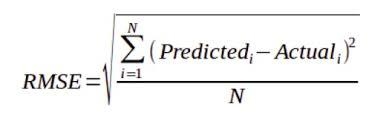
* The R-square (R2), representing the correlation between the observed
outcome values and the predicted outcome values. The higher the R2,
the better the model.

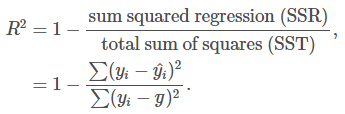


# Task 1c:
1. Do prediction with test_set using model2 and place it into a variable named 'predictions'
2. Create a function 'rmse' to calculate rmse using the formula provided above.
3. Create a function 'r_squared' to calculate r2 using the formula provided above.
4. Calculate rmse value of model2 using test_set's actual and prediction values
5. Calculate the r_squared value of model2 using test_set's actual and prediction values


In [ ]:
# Write code here
# predictions <-

In [ ]:
# Write code here
# rmse <-

In [ ]:
# Write code here
# r_squared <-

In [ ]:
# Calculate rmse

[1] 1.952847

In [ ]:
# Calculate r_squared

[1] 0.8822721

In [ ]:
error_rate_test <- rmse_test/mean(test_set$sales)
error_rate_test

[1] 0.1209821

In [ ]:
data.frame(RMSE = rmse(predictions, test_set$sales),
R2 = r_squared(predictions, test_set$sales))

RMSE,R2
<dbl>,<dbl>
1.952847,0.8822721


From the output above, the R2 is 0.88, meaning that the observed and the
predicted outcome values are highly correlated, which is very good.
The prediction error RMSE is 1.95, representing an error rate of
12%.

# Polynomial regression

This is the simple approach to model non-linear relationships. It add polynomial terms or quadratic terms (square, cubes, etc) to a regression.

In [ ]:
data("Boston", package = "MASS")

We'll use the Boston data set [in MASS package], for predicting the median house value (mdev ), in Boston Suburbs, based on the predictor variable lstat (percentage of lower status of the population).

We’ll randomly split the data into training set (80% for building a predictive model) and test set (20% for evaluating the model). Make sure to set seed for reproducibility.


In [ ]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
set.seed(123)  # for reproducibility

# Split the dataset into train and test by ratio 80/20
sample <- sample(c(TRUE, FALSE), nrow(Boston), replace=TRUE, prob=c(0.8,0.2))
train_set <- Boston[sample, ]
test_set <- Boston[!sample,]

# check number of samples in each dataset
print(nrow(Boston))
print(nrow(train_set))
print(nrow(test_set))

[1] 506
[1] 412
[1] 94


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


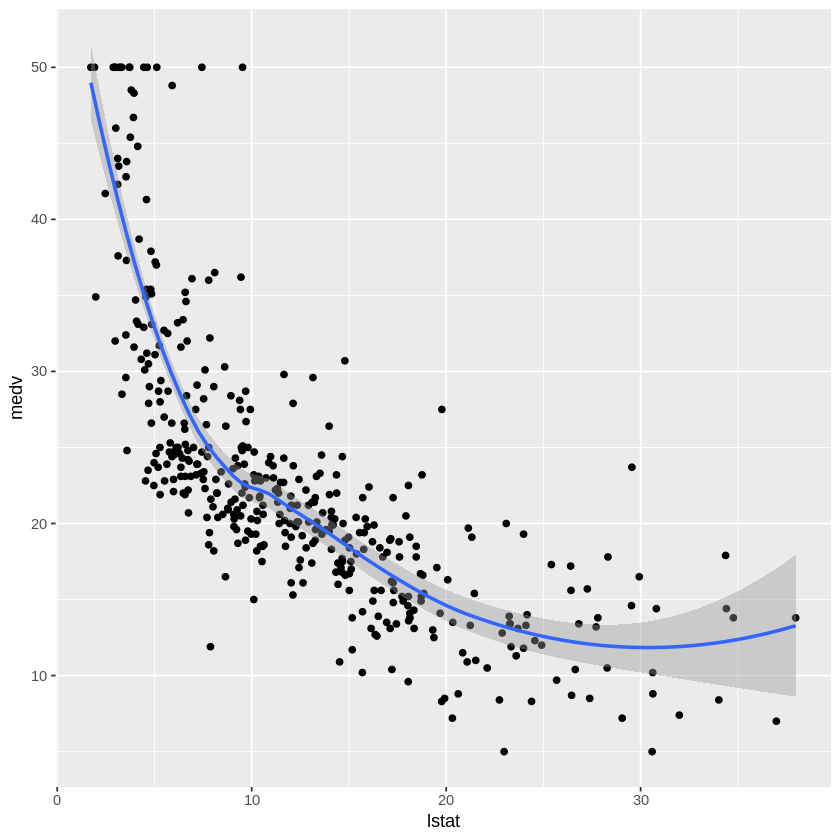

In [ ]:
ggplot(train_set, aes(lstat, medv)) + geom_point() + stat_smooth()

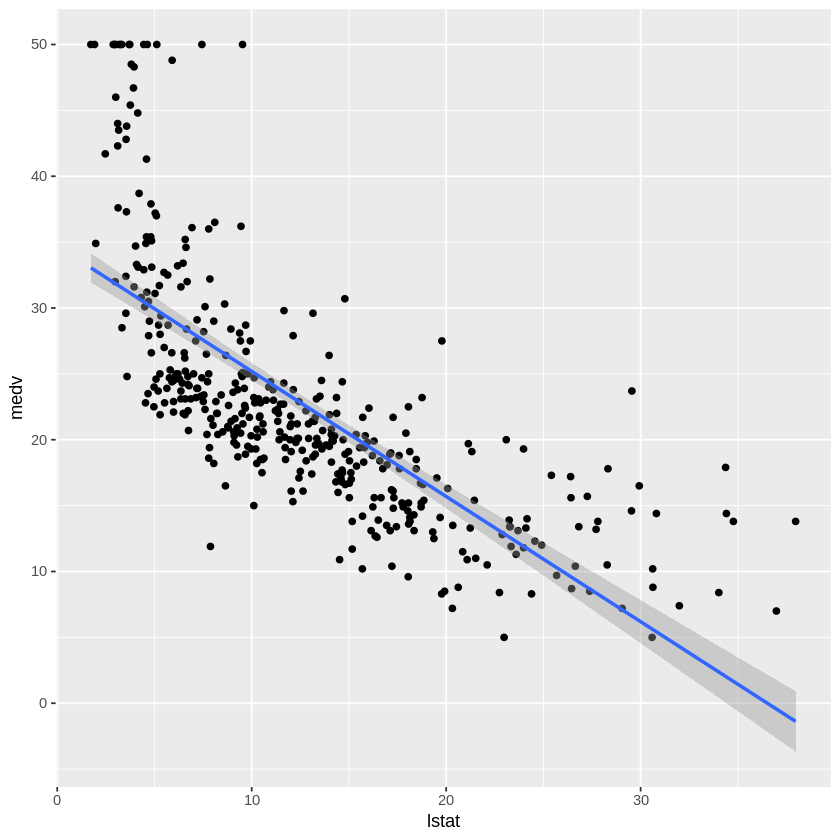

In [ ]:
ggplot(train_set, aes(x=lstat, y=medv)) + geom_point() + stat_smooth(method = lm, formula = y~x)

Lets create a polynomial regression with degree of 2

In [ ]:
poly_model2 <- lm(medv ~ poly(lstat, 2), data=train_set)

In [ ]:
summary (poly_model2)


Call:
lm(formula = medv ~ poly(lstat, 2), data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3758  -3.9258  -0.4012   2.4414  25.4361 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.8296     0.2734   83.51   <2e-16 ***
poly(lstat, 2)1 -138.7882     5.5489  -25.01   <2e-16 ***
poly(lstat, 2)2   65.9431     5.5489   11.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.549 on 409 degrees of freedom
Multiple R-squared:  0.6522,	Adjusted R-squared:  0.6505 
F-statistic: 383.4 on 2 and 409 DF,  p-value: < 2.2e-16


The output contains two coefficients associated with lstat : one for the linear
term (lstat^1) and one for the quadratic term (lstat^2).

In [ ]:
# Just for fun, lets try to create a sixth order polynomial
poly_model6 <- lm(medv ~ poly(lstat, 6), data=train_set)
summary(poly_model6)


Call:
lm(formula = medv ~ poly(lstat, 6), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.362  -2.958  -0.687   2.212  27.067 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.8296     0.2532  90.170  < 2e-16 ***
poly(lstat, 6)1 -138.7882     5.1390 -27.007  < 2e-16 ***
poly(lstat, 6)2   65.9431     5.1390  12.832  < 2e-16 ***
poly(lstat, 6)3  -29.7783     5.1390  -5.795 1.38e-08 ***
poly(lstat, 6)4   23.3224     5.1390   4.538 7.49e-06 ***
poly(lstat, 6)5  -20.2038     5.1390  -3.931 9.93e-05 ***
poly(lstat, 6)6    7.6272     5.1390   1.484    0.139    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.139 on 405 degrees of freedom
Multiple R-squared:  0.7046,	Adjusted R-squared:  0.7002 
F-statistic:   161 on 6 and 405 DF,  p-value: < 2.2e-16


From the output above, it can be seen that polynomial terms beyond the fith
order are not significant.

So, just create a fifth polynomial regression

# Task 2a

In [ ]:
# Create polynomial model with lstat degree 5 and print model summary
# Write code here
# poly_model5 <-


Call:
lm(formula = medv ~ poly(lstat, 5), data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9163  -2.9740  -0.5929   2.1554  27.3469 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.8296     0.2536  90.037  < 2e-16 ***
poly(lstat, 5)1 -138.7882     5.1467 -26.967  < 2e-16 ***
poly(lstat, 5)2   65.9431     5.1467  12.813  < 2e-16 ***
poly(lstat, 5)3  -29.7783     5.1467  -5.786 1.44e-08 ***
poly(lstat, 5)4   23.3224     5.1467   4.532 7.71e-06 ***
poly(lstat, 5)5  -20.2038     5.1467  -3.926 0.000102 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.147 on 406 degrees of freedom
Multiple R-squared:  0.703,	Adjusted R-squared:  0.6993 
F-statistic: 192.2 on 5 and 406 DF,  p-value: < 2.2e-16


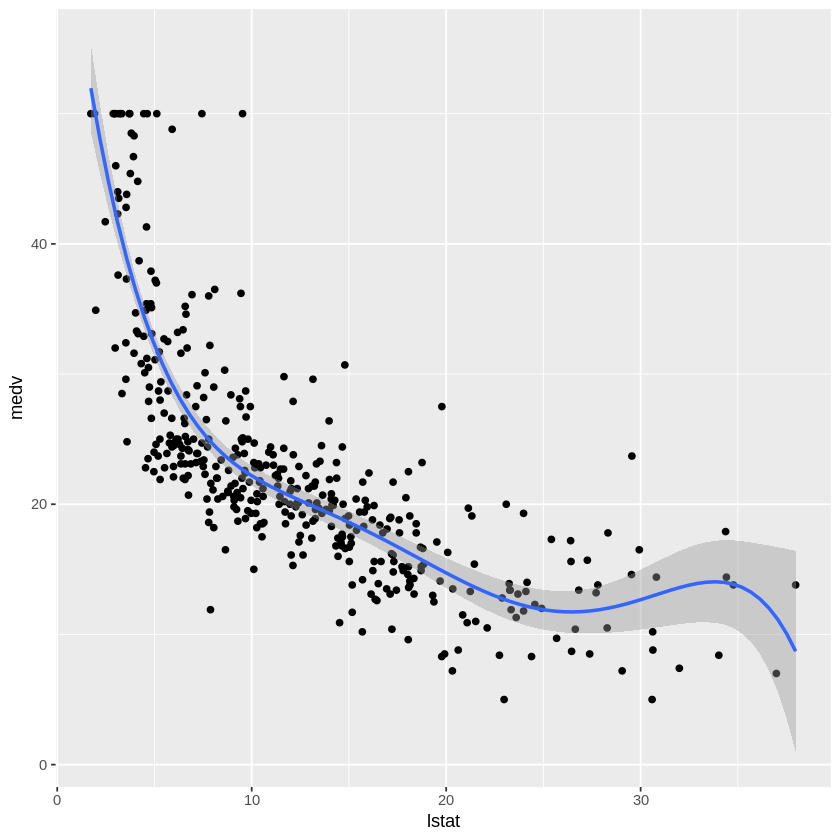

In [ ]:
ggplot(train_set, aes(x=lstat, y=medv)) + geom_point() + stat_smooth(method = lm, formula = y~poly(x,5))

# Task 2b
1. Do prediction with test_set using poly_model5 and insert into test_set under column named 'pred_medv_poly5'
2. Do prediction with test_set using poly_model2 and insert into test_set under column named 'pred_medv_poly2'
3. Print head of test_set to check whether the two new columns are inserted.
4. Create dataframe with r2 and rmse values of both predictions from bullet point 1 and 2.

In [ ]:
# Do prediction with test_set using poly_model5 and insert into test_set under column named 'pred_medv_poly5'
# Do prediction with test_set using poly_model2 and insert into test_set under column named 'pred_medv_poly2'

In [ ]:
# print head of test_set

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,pred_medv_poly5,pred_medv_poly2
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,42.70507,36.94968
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.04907,31.97832
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,15.39798,13.93115
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,14.37463,13.17229
16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9,23.92684,26.27622
20,0.72580,0.0,8.14,0,0.538,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2,21.13426,21.97192


In [ ]:
# Create dataframe to display rmse and r2 values from both predictions, compare the results and select which model is better

RMSE_poly5,R2_poly5,RMSE_poly2,R2_poly2
<dbl>,<dbl>,<dbl>,<dbl>
5.557993,0.319744,5.453393,0.425328


Compare the rmse and r2 values of poly2 and poly5. Which model performs better?

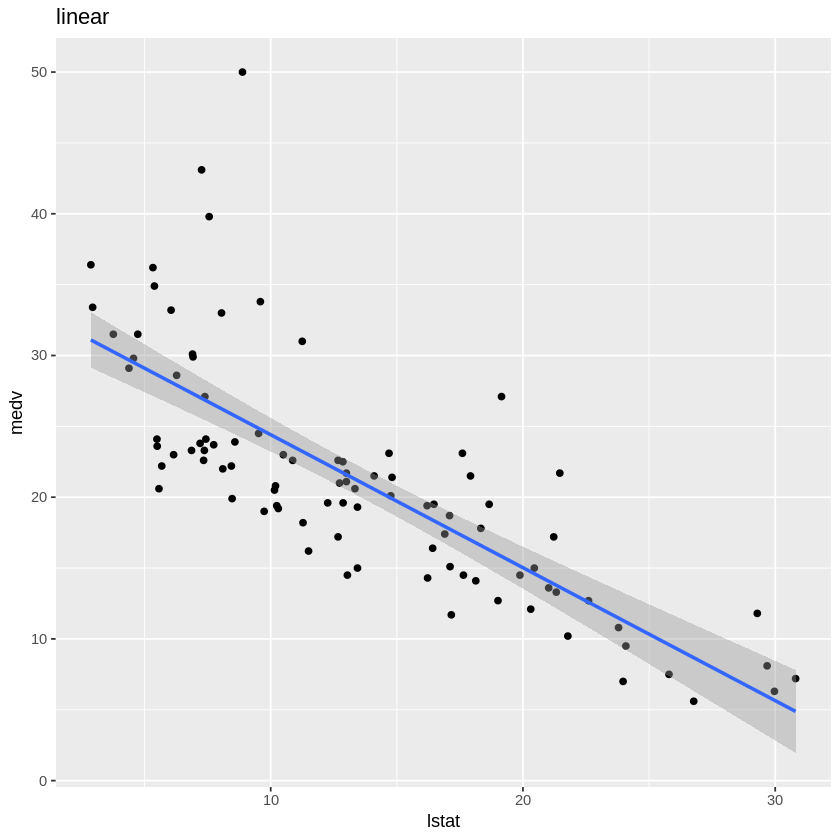

In [ ]:
# Some visualizations
one <- ggplot(test_set, aes(x=lstat, y=medv)) + geom_point() + stat_smooth(method = lm, formula = y~x) + ggtitle('linear')
one

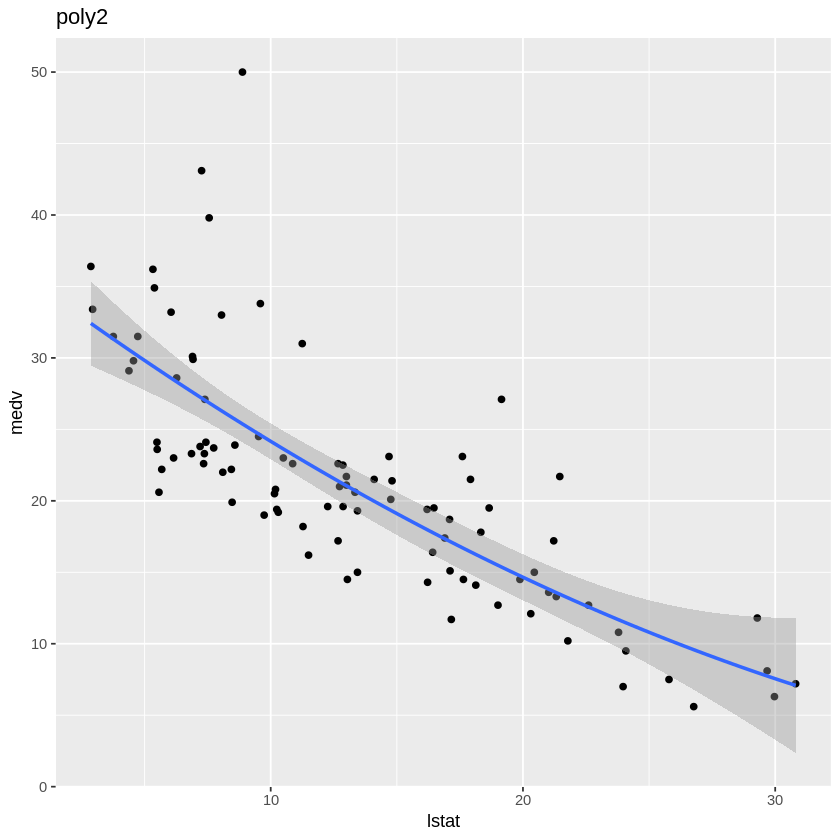

In [ ]:
two <- ggplot(test_set, aes(x=lstat, y=medv)) + geom_point() + stat_smooth(method = lm, formula = y~poly(x,2)) + ggtitle('poly2')
two

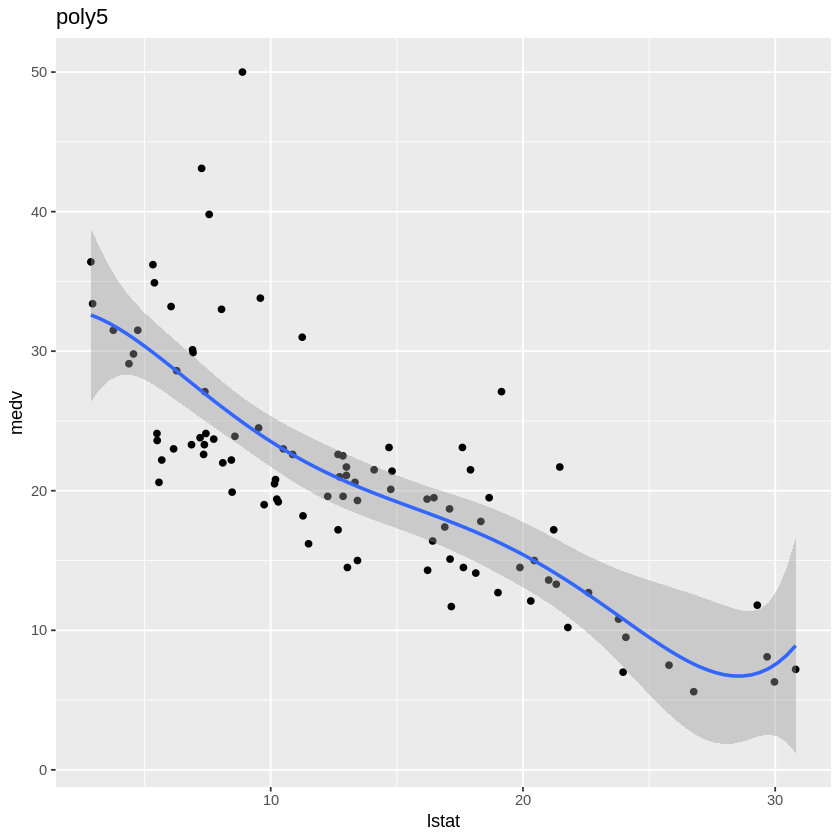

In [ ]:
three <- ggplot(test_set, aes(x=lstat, y=medv)) + geom_point() + stat_smooth(method = lm, formula = y~poly(x,5)) + ggtitle('poly5')
three

In [ ]:
install.packages('patchwork')
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



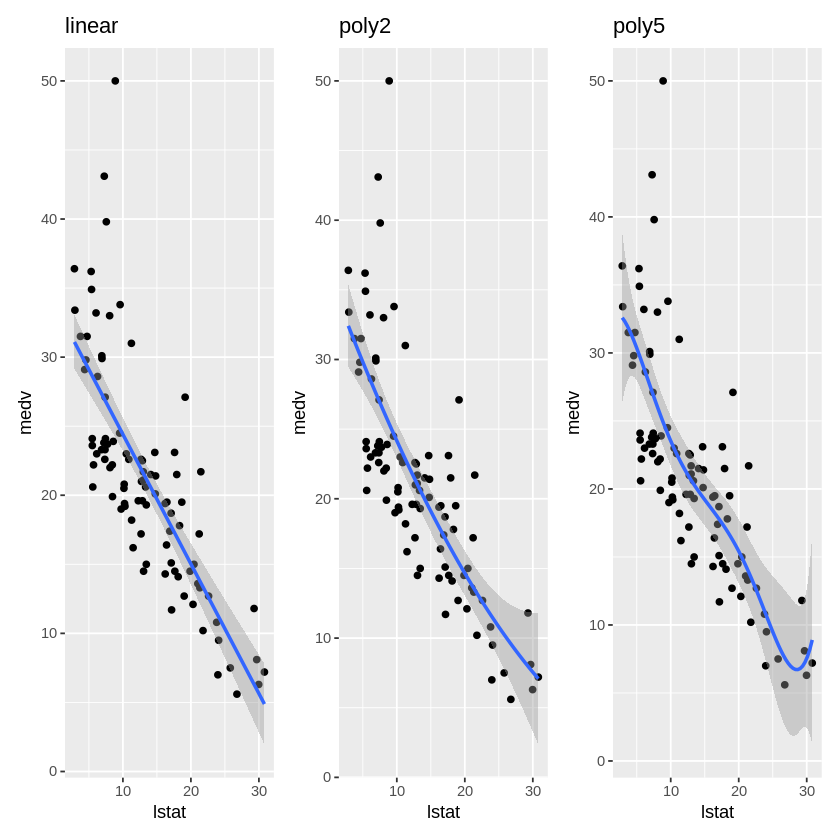

In [ ]:
one + two + three